In [1]:
from keras.layers import LSTM
from keras.models import Sequential, load_model

from timeseries_ml_utils.data import *
from timeseries_ml_utils.statistics import *
from timeseries_ml_utils.encoders import *

import matplotlib.pyplot as plt

# encoders and decoders
linreg = RegressionLine(16)

# fetch data
#data = DataFetcher(["GLD.US"], limit=350)  # 550
data = DataFetcher(["GLD.US"])

print(data.fetch_data().tail())
print(len(data.get_dataframe()))


Using TensorFlow backend.


            GLD.US.Open  GLD.US.High  GLD.US.Low  GLD.US.Close  GLD.US.Volume
Date                                                                         
2018-12-13       117.54       117.62      117.26        117.53        4131770
2018-12-14       116.63       117.30      116.58        117.06        7501660
2018-12-17       117.37       118.03      117.35        117.87        8455007
2018-12-18       117.85       118.20      117.81        118.15        7542875
2018-12-19       118.24       118.96      117.40        117.43       13827509
2256


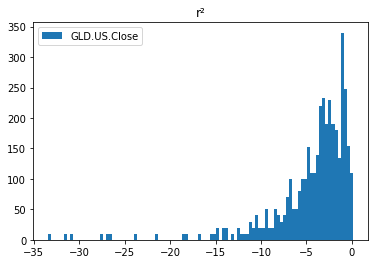

In [9]:
restored = PredictiveDataGenerator("/home/kic/Documents/keras/keras-regression-line-price-1", data.get_dataframe())
prediction = restored.predict()
back_test = restored.back_test_history
back_test.plot_hist()


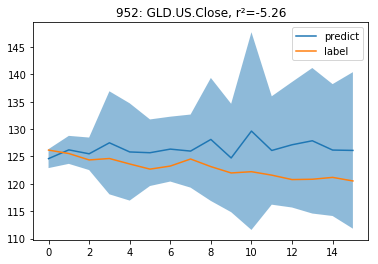

In [19]:
restored.back_test_history.plot_random_sample()

2018-12-20 00:00:00 2019-01-04 00:00:00
            GLD.US.Close  GLD.US.Close_lower  GLD.US.Close_upper
2019-01-04    117.101448          102.800286           131.40261


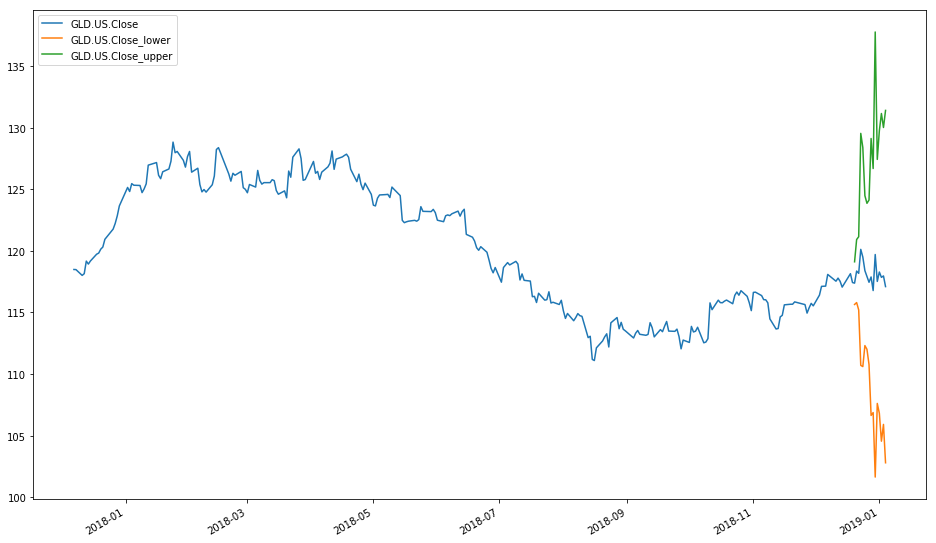

In [8]:
print(prediction.index[-16], prediction.index[-1])
print(prediction[-1:])
prediction.plot(figsize=[16,10])